In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


### Данные

In [2]:
data = pd.read_csv('Student_Performance.csv')
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


**Загрузили датасет**

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


**Получили описание датасета:**
+ 6 столбцов:
    + Hours Studied (кол-во часов учебы)
    + Previous Scores (баллы, полученные в предыдущих тестах)
    + Extracurricular Activities (внеклассные занятия да/нет)
    + Sleep Hours (кол-во часов сна)
    + Sample Question Papers Practiced (примеры отработанных заданий)
    + Performance Index (успеваемость)
+ 10000 строк 

### Визуализация данных

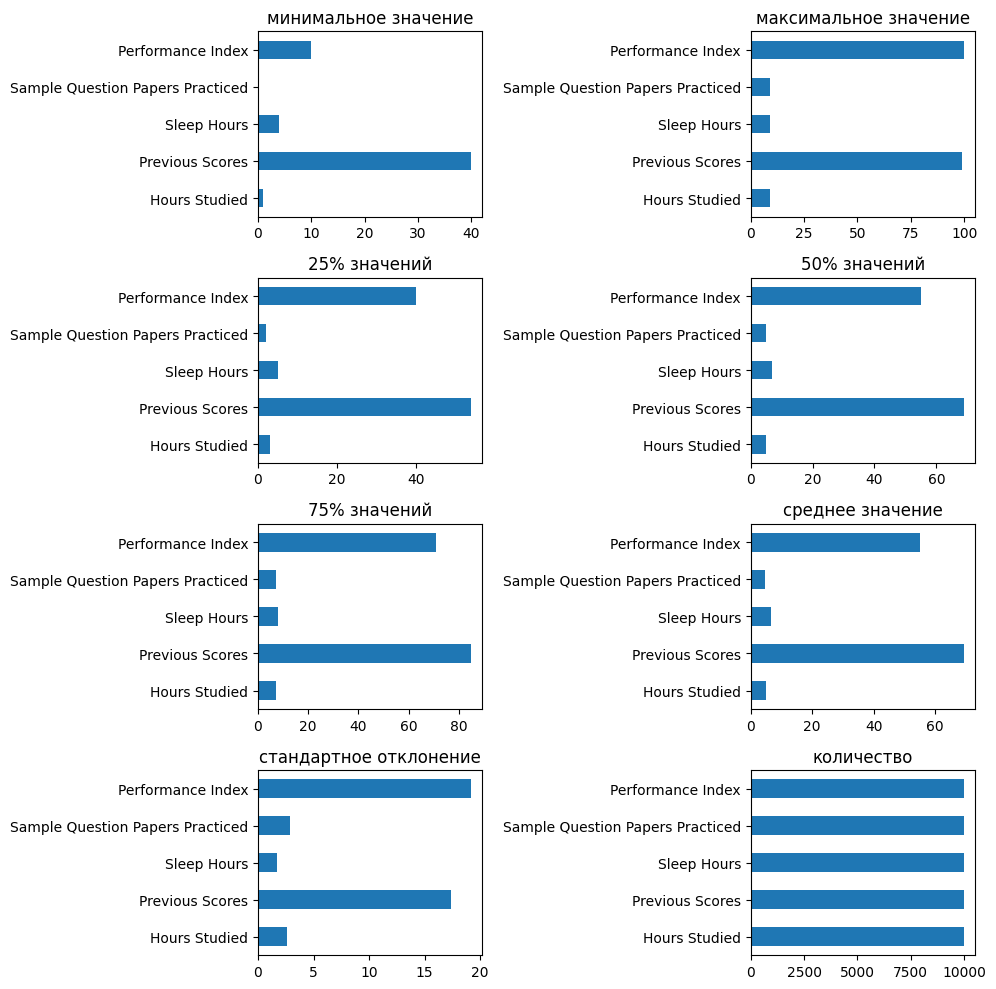

In [4]:
statistic = data.describe()

# Выбор нужных статистик
mean_values = statistic.loc['mean']
std_values = statistic.loc['std']
count_values = statistic.loc['count']
min_values = statistic.loc['min']
quarter_values = statistic.loc['25%']
half_values = statistic.loc['50%']
three_quarters_values = statistic.loc['75%']
max_values = statistic.loc['max']

value_array = [min_values, max_values, quarter_values, half_values, three_quarters_values, mean_values, std_values, count_values]
graf_names = ['минимальное значение', 'максимальное значение',
              '25% значений', '50% значений',
              '75% значений', 'среднее значение',
              'стандартное отклонение', 'количество']

# Размер графика
plt.figure(figsize=(10, 10))

for i in range(1, 9):
    plt.subplot(4, 2, i)
    value_array[i-1].plot(kind='barh')
    plt.title(graf_names[i-1])   

plt.tight_layout()
plt.show()

### Предварительная обработка данных

1. Для **обработки отсутствующих значений** используем *.dropna()*. Эта функция удаляет строки, если в них есть пустые значения
2. Модели машинного обучения работают только с числовыми данными, поэтому **категориальные признаки** нужно преобразовать в числовые. Для этого есть два метода:
    + One-Hot Encoding: преобразует каждое категориальное значение в отдельную бинарную колонку. Для каждого уникального значения создается новая колонка с 0 или 1, показывающее, присутствует ли это значение.
    + Label Encoding: преобразует категориальные значения в числовые. Каждый уникальный категориальный элемент получает свое числовое значение. Больше подходит для бинарных данных, поэтому выберем этот способ для столбца Extracurricular Activities.
3. **Нормировка данных** (нормализация) - процесс преобразования значений числовых признаков так, чтобы они находились в одном диапазоне. Это важно, так как линейная регрессия чувствительна к разбросам. Есть два метода нормализации данных:
    + Min-Max Scaling: преобразует данные так, чтобы они находились в заданном диапазоне (обычно \[0, 1])
        + Чувствителен к выбросам: выбросы существенно меняют диапазон, а значит и нормализованные значения
        + Не подходит для данных с сильно различающимися диапазонами
    + Standardization (Z-score Normalization): преобразует данные так, чтобы они имели среднее значение 0 и стандартное отклонение 1
        + Не чувствителен к выбросам, так как использует среднее и стандартное отклонение

In [5]:
# Обработка отсутствующих значений (удаляет строки с отсутствующими значениями)
data = data.dropna()

# Применяем кодирование для Extracurricular Activities
data['Extracurricular Activities'] = LabelEncoder().fit_transform(data['Extracurricular Activities'])

# Нормировка данных
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1.010455,1.456205,-1.249754,1.862167
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982,0.508818
2,1.161410,-1.063626,1.010455,0.276805,-0.900982,-0.532220
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982,-1.000687
4,0.775188,0.320275,-0.989654,0.866505,0.145333,0.560870
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,1.010455,-1.492294,-0.900982,-1.677362
9996,0.775188,-0.314013,1.010455,0.866505,0.145333,0.144454
9997,0.388965,0.781575,1.010455,0.866505,0.145333,0.977285
9998,1.547633,1.588851,1.010455,0.276805,-1.598526,2.070374


### Разделение данных на обучающие и тестовые

Разделение данных происходит при помощи функции *train_test_split()*, которая разделяет датафреймы на случайные обучающие и тестовые наборы.
+ test_size=0.2 - 20% данных пойдут в тестовый набор, остальное в обучающий
+ random_state=42 - позволяет получать одинаковые результаты при каждом запуске кода

In [6]:
X = data.drop('Performance Index', axis=1) # все признаки кроме целевого
y = data['Performance Index'] # целевой признак

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Линейная регрессия методом наименьших квадратов

**Интерспет** - это значение, которое принимает целевая переменная y, когда все независимые переменные X равны нулю. В графическом представлении, интерсепт - это точка пересечения линии регрессии с ОY.
 

###### Объяснение:
np.ones((X.shape\[0], 1)) создает массив, состоящий из единиц, кол-во строк равно кол-ву образцов данных X.

np.c_ объединяет массив единиц с оригинальной матрицей признаков X.

X_b.T - транспортированная матрица X_b.

X_b.T.dot(X_b) - умножение транспонированной матрицы X_b на матрицу X_b. Создает квадратную матрицу, необходимую для вычисления.

np.linalg.inv() - находит обратную матрицу. 

dot(y) умножает полученную матрицу на вектор целевого y (значения которого мы хотим предсказать).

y=β0+β1⋅x1+β2⋅x2+...+βn⋅xn

###### Порядок вычислений:
1. Составляем матрицу признаков со столбцом интерсепта
2. $beta=(X_b^T*X_b)^{-1}*X_b^T*y$

###### Пример решения:

| $x_1$ | $y_1$ |
| ----- | ----- |
| 1     | 4     |
| 5     | 1     |
| 3     | 7     |
| 7     | 4     |

1. $X_b=\begin{pmatrix}1&1\\1&5\\1&3\\1&7\end{pmatrix}$ $y=\begin{pmatrix}4\\1\\7\\4\end{pmatrix}$
2. $X_b^T*X_b=\begin{pmatrix}1&1&1&1\\1&5&3&7\end{pmatrix}*\begin{pmatrix}1&1\\1&5\\1&3\\1&7\end{pmatrix}=\begin{pmatrix}4&16\\16&84\end{pmatrix}$ 
3.  $(X_b^T*X_b)^{-1}=\begin{pmatrix}1.05&-0.2\\-0.2&0.05\end{pmatrix}$
4. $beta=(X_b^T*X_b)^{-1}*X_b^T*y=\begin{pmatrix}5.2\\-0.3\end{pmatrix}$

beta - параметры модели, которые определяют как изменение каждого признака влияет на целевую переменную.

In [7]:
def linear_regression(X, y):
    # Добавляем столбец единиц для интерсепта 
    X_b = np.c_[np.ones((X.shape[0], 1)), X] # добавляем x0 = 1 для интерсепта
    # Используем формулу нормальных уравнений для вычисления коэффициентов
    beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return beta


### Постройка трех моделей с различными наборами признаков

#### Модели и наборы данных

+ **Модель 1**: Все доступные признаки.
+ **Модель 2**: Количество часов сна.
+ **Модель 3**: Все признаки, кроме Sleep Hours 

#### Списки для хранения результатов
+ **models**: Словарь с моделями и соответствующими признаками.
+ **betas**: Словарь, в который будут записаны коэффициенты (веса) для каждой модели после выполнения линейной регрессии.
+ **scores**: Словарь для хранения метрики $R^2$ для каждой модели

\***коэффициенты или веса** - это параметры модели, которые определяют влияние каждого признака на предсказание целевого значения.
+ Положительный вес означает, что увеличение значения признака ведет к увеличению предсказанного значения.
+ Отрицательный вес означает, что увеличение значения признака ведет к уменьшению предсказанного значения.
+ Нулевой вес говорит о том, что признак не влияет на предсказанное значение.
Модель обучается таким образом, чтобы найти такие значения весов, которые минимизируют ошибку между предсказанными значениями и реальным значениями y.

### Предсказанные значения
```
y_pred = np.c_[np.ones((X_model.shape[0], 1)), X_model].dot(betas[model_name])
```
+ np.c_ объединяет массив единиц с матрицей признаков X_model.
+ np.ones((X_model.shape[0], 1)) создает двумерный массив (матрицу) из единиц, где
    + X_model.shape[0] - это количество строк в матрице X_model
    + 1 - количество столбцов
+ .dot(betas[model_name]) умножаем матрицу с добавленным интерсептом на вектор коэффициентов для получения предсказанных значений y_pred.

### Вычисление коэффициента детерминации ($R^2$)
```
r2_score = 1 - (np.sum((y_train.values - y_pred) ** 2) / np.sum((y_train.values - np.mean(y_train.values)) ** 2))
scores[model_name] = r2_score
```

\***$R^2$(коэффициент детерминации)** - показатель оценки качества модели регрессии. Показывает, насколько хорошо модель описывает данные. Помогает измерить, насколько хорошо предсказанные значения модели соответствуют реальным значениям целевой переменной.
$$
R^2=1-\frac{\sum{(y_{истинные}-y_{предсказанные})^2}}{\sum{(y_{истинные}-\vec{y})^2}}
$$

In [8]:
print(data.head())

# Модель 1
X1 = X_train

# Модель 2
X2 = X_train[['Sleep Hours']]

# Модель 3
X3 = X_train.drop('Sleep Hours', axis=1)

# Списки для хранения результатов
models = {'Model 1': X1, 'Model 2': X2, 'Model 3': X3}
betas = {}
scores = {}

# Для каждой модели вычисляем коэффициенты и R^2
for model_name, X_model in models.items():
    # Рассчет коэффициентов линейной регрессии
    betas[model_name] = linear_regression(X_model.values, y_train.values)
    
    # Предсказанные значения на обучающем наборе
    y_pred = np.c_[np.ones((X_model.shape[0], 1)), X_model].dot(betas[model_name])
    
    # Рассчитываем R^2
    r2_score = 1 - (np.sum((y_train.values - y_pred) ** 2) / np.sum((y_train.values - np.mean(y_train.values)) ** 2))
    scores[model_name] = r2_score

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.775188         1.704176                    1.010455     1.456205   
1      -0.383481         0.723913                   -0.989654    -1.492294   
2       1.161410        -1.063626                    1.010455     0.276805   
3       0.002742        -1.005963                    1.010455    -0.902594   
4       0.775188         0.320275                   -0.989654     0.866505   

   Sample Question Papers Practiced  Performance Index  
0                         -1.249754           1.862167  
1                         -0.900982           0.508818  
2                         -0.900982          -0.532220  
3                         -0.900982          -1.000687  
4                          0.145333           0.560870  


In [9]:
# Выводим результаты
for model_name in scores:
    print(f"{model_name}:")
    print(f"  Coefficients: {betas[model_name]}")
    print(f"  R² Score: {scores[model_name]}\n")

Model 1:
  Coefficients: [8.30581686e-04 3.84434067e-01 9.18033994e-01 1.58389685e-02
 4.20988925e-02 2.86295798e-02]
  R² Score: 0.9886898790682355

Model 2:
  Coefficients: [0.00422462 0.04434156]
  R² Score: 0.001974433847103274

Model 3:
  Coefficients: [0.00110505 0.38474052 0.91802916 0.01498634 0.02863829]
  R² Score: 0.9869109372556507



### Выводы на основе результатов

##### Model 1 (полный набор признаков)
+ **Коэффициенты**: Модель включает все доступные признаки. Коэффициенты показывают, что каждый признак влияет на целевой показатель (Performance Index). Самое значимое влияние оказывают Hours Studied и Sleep Hours.
+ **$R^2$Score: 0.9887**: Эта модель показывает очень высокую точность, почти 99% объясненной дисперсии, это говорит нам о том, что включение всех признаков позволяет очень хорошо предсказывать целевой показатель.
##### Model 2 (только Sleep Hours)
+ **Коэффициенты**: Модель использует только признак Sleep Hours и константный интерсепт. Судя по коэффициенту, Sleep Hours сам по себе почти не объясняет вариацию целевого признака.
+ **$R^2$Score: 0.002**: Эта модель крайне неэффективна. Использование одного признака Sleep Hours почти не помогает предсказать целевой показатель.
##### Model 3 (все признаки, кроме Sleep Hours)
+ **Коэффициенты**: Эта модель включает все признаки кроме Sleep Hours.
+ **$R^2$Score: 0.9869**: Способности модели близки к первой, что подтверждает, что Sleep Hours не имеет сильного влияния.

Почему получилось так, что в первой модели Sleep Hours имеет высокий коэффициент, но при этом несильно влияет на предсказание? 
+ Sleep Hours коррелирует с другими признаками, например, Hours Studied
+ Мультиколлинеарность. Это означает, что несколько признаков могут давать схожую информацию и перекрывать влияние друг друга. Это может приводить к высокой оценке коэффициента, даже если признак сам по себе не является значимым.

In [10]:
# Бонусное задание: синтетический признак
data['Synthetic Feature'] = data['Hours Studied'] * data['Previous Scores']

# Обновляем данные для обучения и тестирования с новым синтетическим признаком
X_new = data.drop('Performance Index', axis=1)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Обучение новой модели с синтетическим признаком
beta_new_model = linear_regression(X_train_new.values, y_train_new.values)

# Предсказанные значения для новой модели на обучающей выборке
y_pred_new = np.c_[np.ones((X_train_new.shape[0], 1)), X_train_new].dot(beta_new_model)

# Рассчитываем R^2 для новой модели с синтетическим признаком
r2_score_new = 1 - (np.sum((y_train_new.values - y_pred_new) ** 2) / np.sum((y_train_new.values - np.mean(y_train_new.values)) ** 2))

print(f'R^2 для модели с синтетическим признаком: {r2_score_new}')

# Сравнение с предыдущими моделями
models['Model with Synthetic Feature'] = X_train_new
scores['Model with Synthetic Feature'] = r2_score_new
betas['Model with Synthetic Feature'] = y_pred_new

# Вывод всех оценок
for model_name in scores:
    print(f"{model_name}:")
    print(f"  Coefficients: {betas[model_name]}")
    print(f"  R² Score: {scores[model_name]}\n")


R^2 для модели с синтетическим признаком: 0.9886898956731601
Model 1:
  Coefficients: [8.30581686e-04 3.84434067e-01 9.18033994e-01 1.58389685e-02
 4.20988925e-02 2.86295798e-02]
  R² Score: 0.9886898790682355

Model 2:
  Coefficients: [0.00422462 0.04434156]
  R² Score: 0.001974433847103274

Model 3:
  Coefficients: [0.00110505 0.38474052 0.91802916 0.01498634 0.02863829]
  R² Score: 0.9869109372556507

Model with Synthetic Feature:
  Coefficients: [-1.08029038 -1.53681055  0.13818212 ... -0.52957954 -1.78008481
 -1.69916998]
  R² Score: 0.9886898956731601



##### Model with Synthetic Feature (Hours Studied * Previous Scores)
+ **Коэффициенты**: Отрицательные коэффициенты указывают на то, что, при увеличении этих признаков, значение Performance Index будет уменьшаться. Это можно объяснить тем, что студенты, которые больше спят, тратят меньше времени на учебу, что влияет на Performance Index.
+ **$R^2$Score: 0.9868**: Коэффициент имеет очень высокий показатель, что говорит о том, что такая вариация хорошо подходит для данных.